# Homework 1

## [Hongwei Zha] - [hz2816]

### Due: Friday Feb 18th 11:59pm ET

In this homework we'll do some data exploration and perform a hypothesis test.


## Instructions

Replace Name and UNI in the first cell and filename with your UNI and name.

Follow the comments below and fill in the blanks (____) to complete.

Where a text response is asked for, please enter as a comment, starting each line with #.

# Environment Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

## Part 1: Data Exploration

One data science task, and a common one used for data science interviews, is to predict defaults on loans.<br>
We're going to load a subset of a common loan dataset and explore some of the features.

Here is a brief description of the features included:

- **loan_amnt**: The amount of money applied for
- **term**: The period over which the load should be repaid
- **annual_inc**: Annual income of the borrower
- **purpose**: The purpose of the loan, such as: credit_card, debt_consolidation, etc.
- **home_ownership**: The borrower's relationship with their primary residence
- **outcome**: The result of the loan: paid off or default

In [3]:
# 1. (1pt) Load the data from ../data/loan_data_subset.csv into the variable df 
#    using the default separator ','
#    using the column 'id' as the index with index_col='id'

df = pd.read_csv('C:/Users/zha/Downloads/loan_data_subset.csv',sep = ',',index_col = 'id')

In [4]:
# 2. (1pt) Using .shape, how many rows and columns does the dataset have?
#    Note: you should see 1000 rows and 6 columns

print(f'dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

dataframe has 1000 rows and 6 columns.


In [5]:
# 3. (1pt) Display the first 3 rows of the dataset using .head()

df.head(3)

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
id,,,,,,
id0,7875,36 months,40000,credit_card,MORTGAGE,paid off
id1,9325,36 months,47000,debt_consolidation,MORTGAGE,paid off
id2,10600,36 months,28264,debt_consolidation,RENT,paid off


In [6]:
# 4. (1pt) What's an example of a numeric feature included in the dataset? (give column label)
df.dtypes
# loan_amnt is an example of a numeric feature included in the dataset.

loan_amnt          int64
term              object
annual_inc         int64
purpose           object
home_ownership    object
outcome           object
dtype: object

In [7]:
# 5. (1pt) What's an example of a categorical feature in the dataset? (give column label)

# purpose is an example of a categorical feature in the dataset.

In [8]:
# 6. (1pt) To practice indexing, 
#   display rows with labels (not-positional index) id100 to id102 inclusive, with all columns
#   We should see 3 rows, 6 columns

df.loc['id100':'id102',]

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
id,,,,,,
id100,10000,36 months,75000,credit_card,RENT,paid off
id101,3000,36 months,72000,other,RENT,paid off
id102,16000,36 months,79000,debt_consolidation,RENT,paid off


In [9]:
# 7. (3pt) For more practice, 
#  After sorting by 'annual_inc' decending, 
#    show the top 3 rows and only columns ['loan_amnt','annual_inc','outcome']

df.sort_values(by = 'annual_inc', ascending = False).head(3).loc[:,['loan_amnt','annual_inc','outcome']]

,loan_amnt,annual_inc,outcome
id,,,
id768,25000,367000,default
id201,18000,334000,paid off
id419,14000,310000,paid off


In [11]:
# 8. (3pt) To practice boolean indexing, 
#    find the mean annual_inc for rows with:
#        (loan_amnt greater than the median loan_amnt) and
#        (outcome of 'paid off') and
#        (home_ownership of 'MORTGAGE' or 'OWN')

cond = (df['loan_amnt'] > np.median(df['loan_amnt'])) & (df['outcome'] == 'paid off') & ((df['home_ownership'] == 'MORTGAGE') | (df['home_ownership'] == 'OWN'))
mean_annual_inc = np.mean(df['annual_inc'].loc[cond,])

# Print the mean annual income found with precision of 2
print(f'{mean_annual_inc = :0.2f}')

mean_annual_inc = 98223.29


In [12]:
# 9. (1pt) Calculate the frequencies of the different values seen in the column 'purpose' using .value_counts()
#    Store in purpose_counts.

purpose_counts = df['purpose'].value_counts()

print(purpose_counts)

debt_consolidation    542
credit_card           173
other                  93
home_improvement       62
major_purchase         34
small_business         33
medical                15
wedding                15
moving                 12
house                  10
car                     7
vacation                4
Name: purpose, dtype: int64


<AxesSubplot:xlabel='count', ylabel='purpose'>

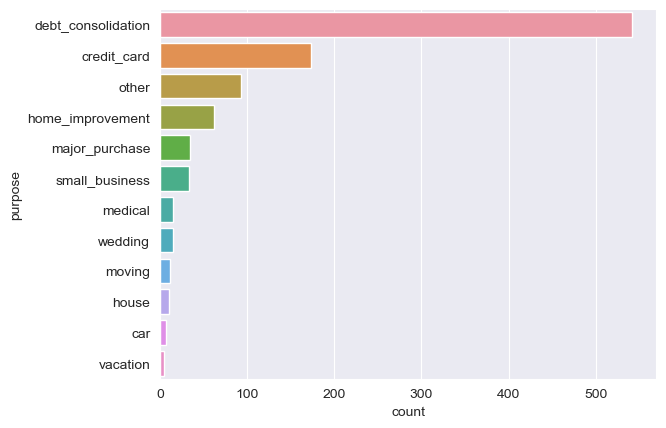

In [13]:
# 10. (3pt) Plot the frequency of each of the categories seen in the 'purpose' column of df using sns.countplot()
#   Order the bars using the purpose_counts.index, generated in the cell above, 
#      which is sorted by frequency by default. (use the order= argument in sns.countplot())
#   Because there are many values, and some of the labels are long, 
#      place 'purpose' on the y-axis instead of the x-axis (use y= instead of x=).

sns.countplot(data = df, order = purpose_counts.index, y = 'purpose')

In [14]:
# 11. (2pt) What is the mean loan_amnt for each category in purpose?
#     Use groupby()
#     Sort the resulting series by value decending

df.groupby('purpose').loan_amnt.apply(lambda x: np.mean(x)).sort_values(ascending = False)

purpose
small_business        15344.696970
house                 14717.500000
debt_consolidation    14440.221402
credit_card           12776.589595
home_improvement      12114.516129
major_purchase        11732.352941
other                  9758.064516
wedding                9153.333333
vacation               7700.000000
medical                6666.666667
car                    5542.857143
moving                 4933.333333
Name: loan_amnt, dtype: float64

In [15]:
# 12. (1pt) Display the summary statistics of annual_inc using .describe()

df['annual_inc'].describe()

count      1000.000000
mean      68158.890000
std       40271.746339
min       10000.000000
25%       42000.000000
50%       60000.000000
75%       83000.000000
max      367000.000000
Name: annual_inc, dtype: float64

In [17]:
# 13. (2pt) There appears to be a fairly large difference between mean and median in annual_inc.
#   Print out the absolute difference in mean annual_inc and median annual_inc to a precision of 2
#   To calculate the absolute value, use np.abs()

annual_inc_mean = np.mean(df['annual_inc'])

annual_inc_median = np.median(df['annual_inc'])

print(f'absolute difference = {np.abs(annual_inc_mean-annual_inc_median):0.2f}')

absolute difference = 8158.89


<AxesSubplot:xlabel='annual_inc'>

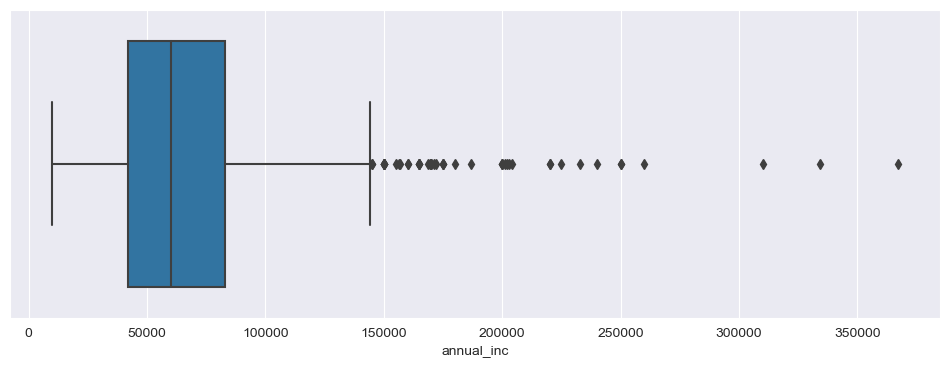

In [20]:
# 14. (2pt) Display a boxplot of annual_inc using sns.boxplot.

#  To make the plot wider, use plt.subplots with 1 row, 1 column of axes and a figsize of (12,4)
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))

#  Plot a boxplot of annual_inc using sns.boxplot() and ax with annual_inc on the x-axis
sns.boxplot(x = df['annual_inc'], ax = ax)

In [21]:
# 15. (1pt) We'll remove some of records with the highest annual_inc, treating them as outliers.
#    What is the 95th percentile of annual_inc? (use .percentile from numpy or .quantile from pandas)
#    Eg. Where is the cutoff where we remove extremely high values but keep 95% of the data?

annual_inc_95 = df['annual_inc'].quantile(q=0.95)

print(f'95th percentile of annual_inc: {annual_inc_95:0.2f}')

95th percentile of annual_inc: 141195.95


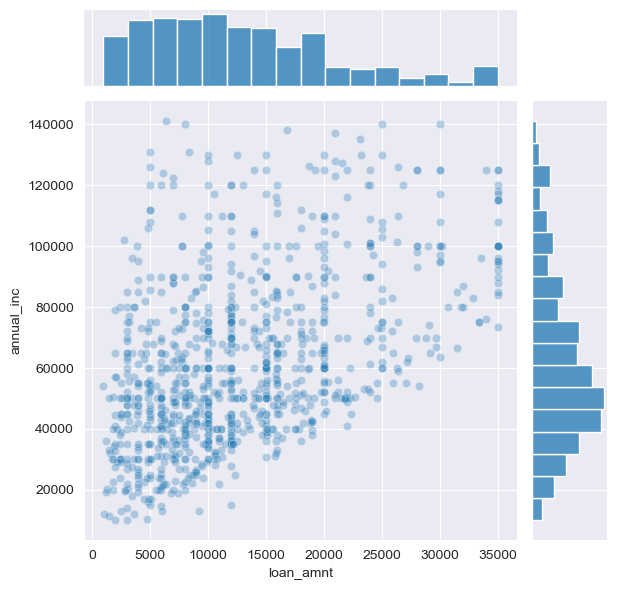

In [23]:
# 16. (3pt) Plot loan_amnt (x-axis) against annual_inc (y-axis) using sns.jointplot(), excluding our outliers
#     only including rows where annual_inc < annual_inc_95
#     set alpha=0.3 to add transparency to markers
#  Note that the histogram of annual_inc is now less right skewed (fewer very high values).
cond = df['annual_inc'] < annual_inc_95
sns.jointplot(data = df.loc[cond,], x = 'loan_amnt', y = 'annual_inc', alpha = 0.3)

Text(0.5, 1.0, 'Annual Income Means')

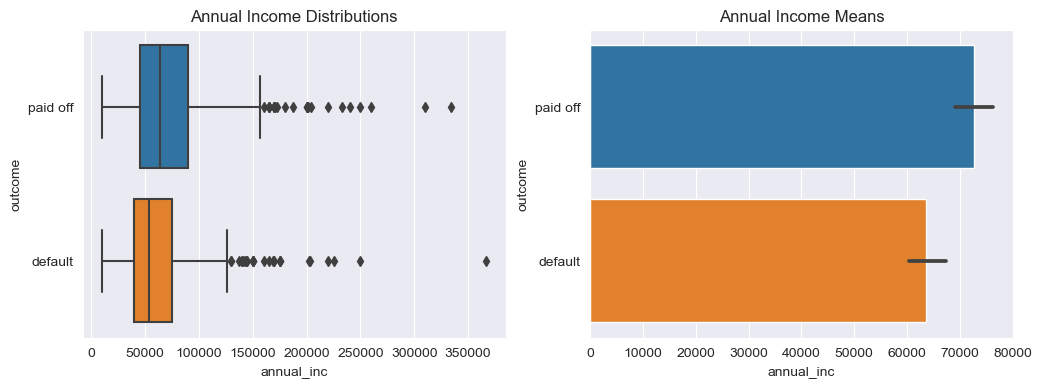

In [28]:
# 17. (5pt) Visualize annual income (annual_inc) by outcome.
#     Outcome takes two values: 'paid off' and 'default'

# NOTE: In all of the below use all rows of df, not limiting to df.annual_inc less than annual_inc_95

# Here, we'll create 2 plots, one that compares the distributions of annual_inc by outcome,
# the other comparing the mean of annual_inc by outcome

# Create a subplot with 1 row and 2 columns with figsize of (12,4) and capture the fig and ax return as fig,ax
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

# On the first axis (ax[0]) use sns.boxplot() to compare the distribution of annual_inc by outcome
#   Place 'annual_inc' on the x-axis and 'outcome' on the y-axis.
sns.boxplot(x = df['annual_inc'], y = df['outcome'], ax = ax[0])

# Set the title on the first axis ax[0] to be 'Annual Income Distributions'
ax[0].set_title('Annual Income Distributions')

# On the second axis (ax[1]) use sns.barplot() to compare the means of annual_inc by outcome
#   Place 'annual_inc' on the x-axis and 'outcome' on the y-axis.
sns.barplot(x = df['annual_inc'], y = df['outcome'], ax = ax[1])

# Set the title on the second plot to be 'Annual Income Means'
ax[1].set_title('Annual Income Means')

## Part 2: Hypothesis Testing

The plots in the question above indicate a difference in annual_inc by outcome.

Let's test the hypothesis that there is a difference in mean annual_inc for loans with an outcome of 'paid off' vs loans with an outcome of 'default'.

In [32]:
# 18. (3pt) Calculate the difference in mean annual_inc between 'paid off' and 'default' 
#     Use: mean annual_inc of paid off - mean annual_inc of default

# Calculate the mean value for each group
mean_annual_inc_paid_off = np.mean(df.loc[df['outcome'] == 'paid off',]['annual_inc'])
mean_annual_inc_default = np.mean(df.loc[df['outcome'] == 'default',]['annual_inc'])
observed_mean_diff = mean_annual_inc_paid_off - mean_annual_inc_default

# Print the the value of observed_mean_diff with a precision of 2
print(f'{observed_mean_diff = :.2f}')

observed_mean_diff = 9062.74


In [44]:
# 19. (5pt) We'll perform a permutation test to see how significant this difference is
#    by generating 1,000 random permutation samples of mean difference

rand_mean_diffs = [] 
n_samples = 1000
n_paid_off = sum(df['outcome'] == 'paid off') # the number of observations with outcome of 'paid off'
print(f'{n_paid_off = :d}')

for i in range(n_samples):
    
    # Get a random permutation of df.annual_inc
    # Use the pandas .sample() function with 
    #    sample size the same size as original dataset
    #    sampling without replacement
    #    random_state == i (the index of the loop) for consistency in grading
    rand_perm = df.sample(frac = 1, replace = False, random_state = i)
    
    # Take the mean of the first n_paid_off random values
    rand_mean_paid_off = np.mean(rand_perm['annual_inc'][:n_paid_off])
    
    # Take the mean of the remaining random values
    rand_mean_default = np.mean(rand_perm['annual_inc'][n_paid_off:])
    
    # Append the difference (rand_mean_paid_off - rand_mean_default) to the list rand_mean_diffs
    rand_mean_diffs.append(rand_mean_paid_off - rand_mean_default)
    
# Convert rand_mean_diffs into a numpy array so we can use numpy functions
rand_mean_diffs = np.array(rand_mean_diffs)
    
# check that we have the correct amount of data by asserting that the length of rand_mean_diffs == n_samples
assert len(rand_mean_diffs) == n_samples

# check that we only have one array of differences
assert rand_mean_diffs.ndim == 1

# Display the first three values in rand_mean_diffs so we know when it's done.
rand_mean_diffs[:3]

n_paid_off = 500


array([ 2323.292,  3927.652, -4313.772])

In [46]:
# 20. (5pt) Before we plot the data, let's transform all values to their z-score

# Calculate the sample mean of our rand_mean_diffs using .mean()
mean_rand_mean_diffs = np.mean(rand_mean_diffs)

# Calculate the sample standard deviation using .std()
std_rand_mean_diffs = np.std(rand_mean_diffs)

# Transform rand_mean_diffs to rand_mean_diffs_zscore by subtracting the mean and dividing by the std dev
rand_mean_diffs_zscore = (rand_mean_diffs-mean_rand_mean_diffs) / std_rand_mean_diffs

# Transform the observed_mean_diff as well by subtracting the mean and dividing by the std dev
observed_mean_diff_zscore = (observed_mean_diff-mean_rand_mean_diffs) / std_rand_mean_diffs

# To check our transformation, check that the zscore mean is near 0 and std dev is near 1
print(f'{rand_mean_diffs_zscore.mean() = :0.3f}')
print(f'{rand_mean_diffs_zscore.std()  = :0.3f}')
print(f'{observed_mean_diff_zscore     = :0.3f}')

assert np.abs(rand_mean_diffs_zscore.mean() - 0) < .0001, 'rand_mean_diffs_zscore.mean() should be close to zero'
assert np.abs(rand_mean_diffs_zscore.std() - 1) < .0001, 'rand_mean_diffs_zscore.std() should be close to 1'

rand_mean_diffs_zscore.mean() = 0.000
rand_mean_diffs_zscore.std()  = 1.000
observed_mean_diff_zscore     = 3.415


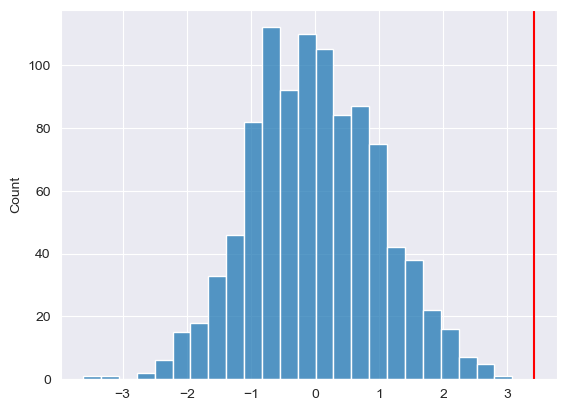

In [49]:
# 21. (2pt) Plot our observed metric against our samples.

# Use seaborn histplot to plot the distribution of rand_mean_diffs_zscore
#    capture the return in ax
ax = sns.histplot(x = rand_mean_diffs_zscore)

# Use ax.axvline() to plot a line at our observed_mean_diff_zscore
# Make the line red using color='r'
ax.axvline(x =observed_mean_diff_zscore, color = 'r')

In [53]:
# 22. (3pt) The plot seems to indicate a difference a real difference in values. What is the p-value?
#    Calculate a two-tailed p_value using np.abs()
#    Recall that we want the proportion of random samples (rand_mean_diffs_zscore) that are 
#      greater than or equal to the observed difference (observed_mean_diff_zscore).
p_value = np.mean(np.abs(rand_mean_diffs_zscore) >= np.abs(observed_mean_diff_zscore))

# print p_value with a precision of 3
print(f'{p_value = :.3f}')

p_value = 0.001
